In [1]:
from matplotlib import pyplot as plt
from numpy.random import randn
import random
%matplotlib inline
import numpy as np
from skimage import color

import sys
sys.path.append("..")
from src import hierarchic_blending_operator
from src import color_converter
from src import color_operations
from src import color_schemes
from src import picture_worker
from src import helper

In [2]:
# For autotesting
%load_ext autoreload
%autoreload 2

Number of points

In [3]:
size = 400

Number of Gaussians to use

In [4]:
number_of_gaussians = 5

Interval to use

In [5]:
x_min, x_max = -10, 10
y_min, y_max = -10, 10
variance_min, variance_max = 2, 30

Color-Maps to use

Matplotlib

In [6]:
matplotlib_color_maps = [color_schemes.random_matplotlib_colorschemes() for i in range(number_of_gaussians)][:number_of_gaussians]

In [7]:
matplotlib_color_maps

['Spectral_r', 'PuRd', 'gnuplot2', 'RdYlBu_r', 'RdYlGn_r']

Monochrom

In [8]:
monochromatic_color_maps = [[1,0,0,1], [0,1,0,1], [0,0,1,1], [1,1,0,1], [0,1,1,1]]

Brewer

In [9]:
brewer_color_maps = ["blue", "green", "orange", "purple", "red"]

Intervall in which to scale

In [10]:
lower_border, upper_border = 0., 1

In [11]:
def generate_gaussian(verbose=False):
    X, Y, Z = helper.get_random_gaussian(x_min,x_max,y_min,y_max,variance_min, variance_max,size,0.6)
    return Z

In [12]:
def generate_matplotlib_color_grid(Z, colorscheme, verbose=False):
    return  picture_worker.get_colorgrid(Z,color_schemes.matplotlib_colorschemes,10,colorscheme=colorscheme, verbose=verbose)


In [13]:
def generate_monochromatic_colorgrid(Z,startcolor ,x_min, x_max, verbose=False):
    img, Z_alpha = picture_worker.get_colorgrid(Z,color_schemes.create_monochromatic_colorscheme,10,False, 
                                                min_value = x_min, max_value = x_max, 
                                                startcolor=startcolor, verbose=verbose)
    return img

In [14]:
def generate_brewer_color_grid(Z,colorscheme ,x_min, x_max, verbose=False):
    return picture_worker.get_colorgrid(Z,color_schemes.create_color_brewer_colorscheme,10,min_value = x_min, max_value = x_max,colorscheme=colorscheme, verbose=verbose)

In [15]:
img_list_matplotlib = []
z_list = []
for i in range(number_of_gaussians):
    z = generate_gaussian()
    z_list.append(z)

### Default Coloring

In [16]:
default_img_list = helper.generate_monochromatic_plot_from_gaussians(z_list[:number_of_gaussians], monochromatic_color_maps[:number_of_gaussians])

In [17]:
default_brewer_list = helper.generate_brewer_plot_from_gaussians(z_list[:number_of_gaussians], brewer_color_maps[:number_of_gaussians])

## Weight Color-space

In [18]:
z_sum = z_list[0].copy()
z_min, z_max = np.min(z_list[0]), np.max(z_list[0])
for i in z_list[1:]:
    i_min = np.min(i)
    i_max = np.max(i)
    print("Min: {} vs {}".format(z_min, i_min))
    print("Max: {} vs {}".format(z_max, i_max))
    z_min = np.min([z_min,i_min])
    z_max = np.max([z_max,i_max])
    z_sum += i

Min: 1.8945878539751212e-08 vs 2.8424790049160098e-06
Max: 0.009870245968268673 vs 0.0074529889035312175
Min: 1.8945878539751212e-08 vs 6.436149503726405e-08
Max: 0.009870245968268673 vs 0.013547409058078039
Min: 1.8945878539751212e-08 vs 8.486972338222042e-06
Max: 0.013547409058078039 vs 0.006162409179643543
Min: 1.8945878539751212e-08 vs 1.4068159996942109e-22
Max: 0.013547409058078039 vs 0.021080011078036465


#### Matplotlib

In [19]:
for z,i in zip(z_list, matplotlib_color_maps):
    img, alpha = generate_matplotlib_color_grid(z, i, False)
    img_list_matplotlib.append(img)

#### Monochromatic

In [20]:
img_list_monochromatic = []

for z, colormap in zip(z_list, monochromatic_color_maps):
    z_min_weight = (upper_border-lower_border)*(np.min(z) - z_min) / (z_max - z_min)+lower_border
    z_max_weight = (upper_border-lower_border)*(np.max(z) - z_min) / (z_max - z_min)+lower_border
    print(z_max_weight)
    img = generate_monochromatic_colorgrid(z, colormap, z_min_weight, z_max_weight, verbose=False)
    img_list_monochromatic.append(img)

0.46822774104481424
0.3535571625622428
0.6426661261195095
0.29233424768283145
1.0


#### Colorbrewer

In [21]:
img_list_brewer = []

for z, colormap in zip(z_list, brewer_color_maps):
    z_min_weight = (upper_border-lower_border)*(np.min(z) - z_min) / (z_max - z_min)+lower_border
    z_max_weight = (upper_border-lower_border)*(np.max(z) - z_min) / (z_max - z_min)+lower_border
    img, _ = generate_brewer_color_grid(z, colormap, z_min_weight, z_max_weight, verbose=False)
    img_list_brewer.append(img)

## RGB-Colorspace

Matplotlib is pointless since you cant weight it. Atleast I dunno how

### Matplotlib Colorschemes

In [22]:
mixed_matplotlib, alpha_new = picture_worker.combine_multiple_images_hierarchic(hierarchic_blending_operator.porter_duff_source_over, img_list_matplotlib, z_list)

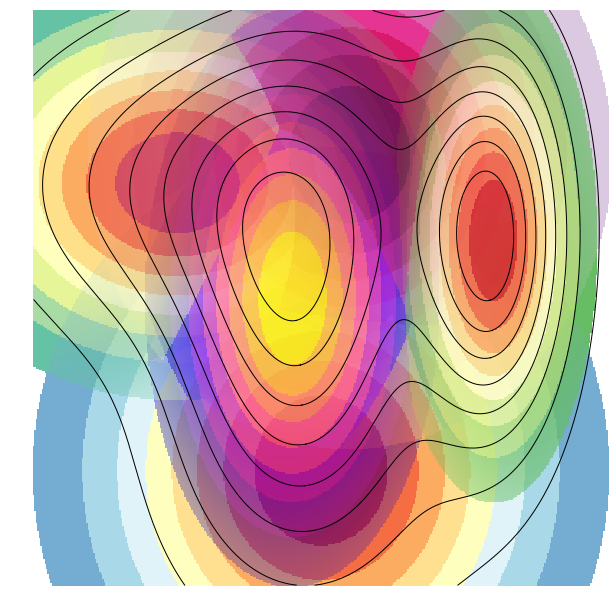

In [23]:
#displays an image
picture_worker.plot_image(mixed_matplotlib, None, z_sum)

### Monochromatic Colorschemes

In [24]:
rgb_mixed_monochrom, alpha_new = picture_worker.combine_multiple_images_hierarchic(hierarchic_blending_operator.porter_duff_source_over, img_list_monochromatic, z_list)

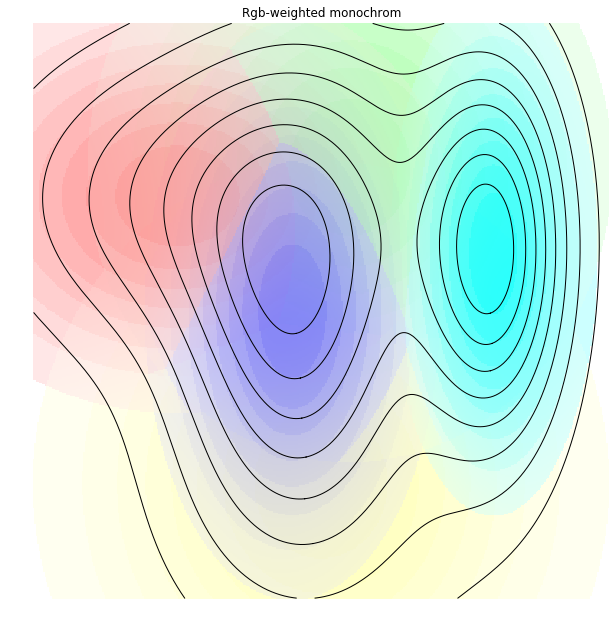

In [25]:
picture_worker.plot_image(rgb_mixed_monochrom, None, z_sum, title = "Rgb-weighted monochrom")

### Colorbrewer Colorscheme

In [26]:
rgb_mixed_brewer, alpha_new = picture_worker.combine_multiple_images_hierarchic(hierarchic_blending_operator.porter_duff_source_over, img_list_brewer, z_list)

In [27]:
picture_worker.plot_image(output[0], None, z_sum, title = "Lab weighted brewer")

NameError: name 'output' is not defined

### Comaring

In [ ]:
rgb_mixed_monochrom_default, alpha_new = picture_worker.combine_multiple_images_hierarchic(hierarchic_blending_operator.porter_duff_source_over, default_img_list, z_list)

In [ ]:
rgb_mixed_brewer_default, alpha_new = picture_worker.combine_multiple_images_hierarchic(hierarchic_blending_operator.porter_duff_source_over, default_brewer_list, z_list)

In [ ]:
images = [rgb_mixed_monochrom_default, rgb_mixed_monochrom, rgb_mixed_brewer_default, rgb_mixed_brewer]
titles = ["Monochrome mixed default", "Monochrome mixed weighted", "Brewer mixed default", "Brewer mixed weighted"]
plot_images(images, None, [z_sum ,z_sum ,z_sum ,z_sum], title = titles, columns = 2, wspace=0)

## Lab-Colorspace

### Matplotlib Colorscheme

In [ ]:
mixed_matplotlib, alpha_new = picture_worker.combine_multiple_images_hierarchic(hierarchic_blending_operator.porter_duff_source_over, img_list_matplotlib, z_list, color_space="lab")

In [ ]:
picture_worker.plot_image(mixed_matplotlib, None, z_sum, title = "Lab Matplotlib")

### Monochromatic Color-Scheme

In [ ]:
lab_mixed_monochrom, alpha_new = picture_worker.combine_multiple_images_hierarchic(hierarchic_blending_operator.porter_duff_source_over, img_list_monochromatic, z_list, color_space="lab")

In [ ]:
picture_worker.plot_image(mixed_matplotlib, None, z_sum, title = "Lab weighted")

### Colorbrewer Colorscheme

In [ ]:
lab_mixed_brewer, alpha_new = picture_worker.combine_multiple_images_hierarchic(hierarchic_blending_operator.porter_duff_source_over, img_list_brewer, z_list, color_space="lab")

In [ ]:
picture_worker.plot_image(lab_mixed_brewer, None, z_sum, title = "Lab weighted brewer")

### Comparisson

In [ ]:
lab_mixed_monochrom_default, alpha_new = picture_worker.combine_multiple_images_hierarchic(hierarchic_blending_operator.porter_duff_source_over, default_img_list, z_list, color_space="lab")

In [ ]:
lab_mixed_brewer_default, alpha_new = picture_worker.combine_multiple_images_hierarchic(hierarchic_blending_operator.porter_duff_source_over, default_brewer_list, z_list, color_space="lab")

In [ ]:
images = [lab_mixed_monochrom_default, lab_mixed_monochrom, lab_mixed_brewer_default, lab_mixed_brewer]
titles = ["Lab mixed default", "Lab mixed weighted", "Lab Brewer mixed default", "Lab Brewer mixed weighted"]
plot_images(images, None, [z_sum ,z_sum ,z_sum ,z_sum], title = titles, columns = 2, wspace=0)

## Comparing all together

In [ ]:
images = [rgb_mixed_monochrom_default, rgb_mixed_monochrom, rgb_mixed_brewer_default, rgb_mixed_brewer, lab_mixed_monochrom_default, lab_mixed_monochrom, lab_mixed_brewer_default, lab_mixed_brewer]
titles = ["Rgb mixed monochrom default", "Rgb mixed monochrom weighted", "Rgb mixed brewer default", "Rgb mixed brewer weighted", "Lab mixed monochrom default", "Lab mixed monochrom weighted", "Lab mixed brewer default", "Lab mixed brewer weighted"]
plot_images(images, None, [z_sum ,z_sum ,z_sum ,z_sum, z_sum, z_sum, z_sum, z_sum], title = titles, columns = 2, wspace=0)